In [24]:
import keras
import random, os
from keras.layers import Activation, Input, Dense, Conv2D, MaxPooling2D, UpSampling2D, Dropout, Flatten
from keras.models import Model, Sequential
from keras import backend as K
from glob import glob
from PIL import Image
import numpy as np
import re
from keras.utils.vis_utils import model_to_dot
import random
import matplotlib.pyplot as plt
from scipy.spatial import distance
import PIL.Image as pilimg
from IPython.display import Image
import PIL

In [3]:
batch_size = 128
num_classes = 6
epochs = 500
img_rows, img_cols = 28, 28
label = ["circle", "square", "triangle", "horizontal", "vertical", "diagonal"]

In [4]:
def load_data():
    tr_path = './dataset/trains/'
    te_path = './dataset/tests/'
    va_path = './dataset/vals/'
    
    (tr_sets, tr_labels, _) = get_datasets_labels(tr_path)
    (te_sets, te_labels, test_labels_with_num) = get_datasets_labels(te_path)
    (va_sets, va_labels, _) = get_datasets_labels(va_path)
    
    
    tr_sets = np.array(tr_sets)
    te_sets = np.array(te_sets)
    va_sets = np.array(va_sets)
    tr_labels = np.array(tr_labels)
    te_labels = np.array(te_labels)
    va_labels = np.array(va_labels)
    test_labels_with_num = np.array(test_labels_with_num)
    return tr_sets, tr_labels, te_sets, te_labels, va_sets, va_labels, test_labels_with_num

In [5]:
def get_datasets_labels(path):
	files = os.listdir(path)
	labels = []
	lbs = []
	sets = []
	for file in files:
		pic = Image.open(path + file)
		lb = file.replace(re.findall("\d+", file)[0], '').replace('.png', '') 
		forlb = file.replace('.png', '') 
		
		labels.append(label.index(lb))
		lbs.append(forlb)
		
		pic = np.array(pic)
		sets.append(pic)
	return sets, labels, lbs

In [6]:
(x_train, y_train, x_test, y_test, x_val, y_val, test_labels_with_num) = load_data()
y_test1 = y_test
y_train = keras.utils.to_categorical(y_train, num_classes)
y_test = keras.utils.to_categorical(y_test, num_classes)
y_val = keras.utils.to_categorical(y_val, num_classes)
input_shape = (img_rows, img_cols, 1)

x_train = x_train.reshape(x_train.shape[0], img_rows, img_cols, 1)
x_test = x_test.reshape(x_test.shape[0], img_rows, img_cols, 1)
x_val = x_val.reshape(x_val.shape[0], img_rows, img_cols, 1)
x_train = x_train.astype('float32')
x_test = x_test.astype('float32')
x_val = x_val.astype('float32')
x_train /= 255.
x_test /= 255.
x_val /= 255.

In [31]:
model = Sequential()
model.add(Conv2D(64, (5, 5), padding='same', input_shape=input_shape))
model.add(Activation('relu'))
model.add(MaxPooling2D((2, 2), padding='same'))

model.add(Conv2D(64, (5, 5), padding='same'))
model.add(Activation('relu'))
model.add(MaxPooling2D((2, 2), padding='same'))
#

model.add(Conv2D(128, (3, 3), padding='same'))
model.add(Activation('relu'))
model.add(MaxPooling2D((2, 2), padding='same'))

model.add(Conv2D(128, (3, 3), padding='same'))
model.add(Activation('relu'))
model.add(MaxPooling2D((2, 2), padding='same'))

model.add(Flatten())
model.add(Dense(128, activation='relu'))
model.add(Dropout(0.25))

model.add(Dense(64, activation = 'relu'))

#model.add(Dropout(0.25))
model.add(Dense(num_classes, activation='softmax'))

In [33]:
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_5 (Conv2D)            (None, 28, 28, 64)        1664      
_________________________________________________________________
activation_5 (Activation)    (None, 28, 28, 64)        0         
_________________________________________________________________
max_pooling2d_5 (MaxPooling2 (None, 14, 14, 64)        0         
_________________________________________________________________
conv2d_6 (Conv2D)            (None, 14, 14, 64)        102464    
_________________________________________________________________
activation_6 (Activation)    (None, 14, 14, 64)        0         
_________________________________________________________________
max_pooling2d_6 (MaxPooling2 (None, 7, 7, 64)          0         
_________________________________________________________________
conv2d_7 (Conv2D)            (None, 7, 7, 128)         73856     
__________

In [34]:
model.compile(loss=keras.losses.categorical_crossentropy,
              optimizer=keras.optimizers.Adadelta(),
              metrics=['accuracy'])

In [35]:
model.fit(x_train, y_train,
          batch_size=batch_size
,          epochs=epochs,
          verbose=1, validation_data=(x_val, y_val))

score = model.evaluate(x_test, y_test, verbose=0)
print('Test loss:', score[0])
print('Test accuracy:', score[1])

#SVG(model_to_dot(model, show_shapes=True).create(prog='dot', format='svg'))

Train on 900 samples, validate on 600 samples
Epoch 1/500
900/900 [==============================] - 0s 405us/step - loss: 1.7945 - acc: 0.1678 - val_loss: 1.7945 - val_acc: 0.1667
Epoch 2/500
900/900 [==============================] - 0s 67us/step - loss: 1.7952 - acc: 0.1533 - val_loss: 1.7961 - val_acc: 0.1667
Epoch 3/500
900/900 [==============================] - 0s 60us/step - loss: 1.7914 - acc: 0.1756 - val_loss: 1.7982 - val_acc: 0.1667
Epoch 4/500
900/900 [==============================] - 0s 61us/step - loss: 1.7917 - acc: 0.1744 - val_loss: 1.7895 - val_acc: 0.2833
Epoch 5/500
900/900 [==============================] - 0s 61us/step - loss: 1.7818 - acc: 0.2133 - val_loss: 2.0453 - val_acc: 0.1667
Epoch 6/500
900/900 [==============================] - 0s 61us/step - loss: 1.8220 - acc: 0.2156 - val_loss: 1.8296 - val_acc: 0.1667
Epoch 7/500
900/900 [==============================] - 0s 58us/step - loss: 1.7827 - acc: 0.2133 - val_loss: 1.8630 - val_acc: 0.1667
Epoch 8/500
900

900/900 [==============================] - 0s 65us/step - loss: 0.5001 - acc: 0.8189 - val_loss: 0.5891 - val_acc: 0.8017
Epoch 62/500
900/900 [==============================] - 0s 62us/step - loss: 0.4950 - acc: 0.7944 - val_loss: 1.4629 - val_acc: 0.5683
Epoch 63/500
900/900 [==============================] - 0s 71us/step - loss: 0.6206 - acc: 0.7756 - val_loss: 0.7802 - val_acc: 0.6683
Epoch 64/500
900/900 [==============================] - 0s 70us/step - loss: 0.4973 - acc: 0.8000 - val_loss: 0.9167 - val_acc: 0.6200
Epoch 65/500
900/900 [==============================] - 0s 73us/step - loss: 0.4998 - acc: 0.8022 - val_loss: 0.7244 - val_acc: 0.6950
Epoch 66/500
900/900 [==============================] - 0s 71us/step - loss: 0.5109 - acc: 0.8033 - val_loss: 0.9944 - val_acc: 0.6483
Epoch 67/500
900/900 [==============================] - 0s 65us/step - loss: 0.4811 - acc: 0.8267 - val_loss: 0.4648 - val_acc: 0.8183
Epoch 68/500
900/900 [==============================] - 0s 68us/step

900/900 [==============================] - 0s 60us/step - loss: 0.0076 - acc: 1.0000 - val_loss: 0.2480 - val_acc: 0.9450
Epoch 122/500
900/900 [==============================] - 0s 59us/step - loss: 0.0250 - acc: 0.9944 - val_loss: 0.9317 - val_acc: 0.7883
Epoch 123/500
900/900 [==============================] - 0s 58us/step - loss: 0.1854 - acc: 0.9533 - val_loss: 0.4463 - val_acc: 0.8683
Epoch 124/500
900/900 [==============================] - 0s 60us/step - loss: 0.0518 - acc: 0.9833 - val_loss: 0.2966 - val_acc: 0.9283
Epoch 125/500
900/900 [==============================] - 0s 61us/step - loss: 0.0239 - acc: 0.9956 - val_loss: 0.2999 - val_acc: 0.9300
Epoch 126/500
900/900 [==============================] - 0s 58us/step - loss: 0.0195 - acc: 0.9956 - val_loss: 0.2327 - val_acc: 0.9400
Epoch 127/500
900/900 [==============================] - 0s 60us/step - loss: 0.0096 - acc: 0.9989 - val_loss: 0.2346 - val_acc: 0.9450
Epoch 128/500
900/900 [==============================] - 0s 62

900/900 [==============================] - 0s 58us/step - loss: 0.0012 - acc: 1.0000 - val_loss: 0.2824 - val_acc: 0.9533
Epoch 182/500
900/900 [==============================] - 0s 58us/step - loss: 0.0012 - acc: 1.0000 - val_loss: 0.2944 - val_acc: 0.9517
Epoch 183/500
900/900 [==============================] - 0s 60us/step - loss: 5.7467e-04 - acc: 1.0000 - val_loss: 0.3282 - val_acc: 0.9500
Epoch 184/500
900/900 [==============================] - 0s 57us/step - loss: 7.6897e-04 - acc: 1.0000 - val_loss: 0.3381 - val_acc: 0.9417
Epoch 185/500
900/900 [==============================] - 0s 62us/step - loss: 8.7996e-04 - acc: 1.0000 - val_loss: 0.2945 - val_acc: 0.9483
Epoch 186/500
900/900 [==============================] - 0s 66us/step - loss: 3.9629e-04 - acc: 1.0000 - val_loss: 0.2890 - val_acc: 0.9467
Epoch 187/500
900/900 [==============================] - 0s 59us/step - loss: 0.0085 - acc: 0.9944 - val_loss: 1.1999 - val_acc: 0.8283
Epoch 188/500
900/900 [=======================

900/900 [==============================] - 0s 64us/step - loss: 5.6424e-04 - acc: 1.0000 - val_loss: 0.2591 - val_acc: 0.9550
Epoch 241/500
900/900 [==============================] - 0s 67us/step - loss: 6.4800e-04 - acc: 1.0000 - val_loss: 0.2635 - val_acc: 0.9533
Epoch 242/500
900/900 [==============================] - 0s 70us/step - loss: 2.8980e-04 - acc: 1.0000 - val_loss: 0.2674 - val_acc: 0.9517
Epoch 243/500
900/900 [==============================] - 0s 67us/step - loss: 4.0113e-04 - acc: 1.0000 - val_loss: 0.2647 - val_acc: 0.9567
Epoch 244/500
900/900 [==============================] - 0s 68us/step - loss: 2.4981e-04 - acc: 1.0000 - val_loss: 0.2753 - val_acc: 0.9517
Epoch 245/500
900/900 [==============================] - 0s 67us/step - loss: 3.3187e-04 - acc: 1.0000 - val_loss: 0.2756 - val_acc: 0.9533
Epoch 246/500
900/900 [==============================] - 0s 73us/step - loss: 2.6381e-04 - acc: 1.0000 - val_loss: 0.2763 - val_acc: 0.9517
Epoch 247/500
900/900 [===========

900/900 [==============================] - 0s 60us/step - loss: 2.3490e-04 - acc: 1.0000 - val_loss: 0.2676 - val_acc: 0.9567
Epoch 300/500
900/900 [==============================] - 0s 60us/step - loss: 1.1305e-04 - acc: 1.0000 - val_loss: 0.2843 - val_acc: 0.9617
Epoch 301/500
900/900 [==============================] - 0s 61us/step - loss: 1.5501e-04 - acc: 1.0000 - val_loss: 0.2784 - val_acc: 0.9567
Epoch 302/500
900/900 [==============================] - 0s 59us/step - loss: 2.3652e-04 - acc: 1.0000 - val_loss: 0.3091 - val_acc: 0.9583
Epoch 303/500
900/900 [==============================] - 0s 60us/step - loss: 0.1168 - acc: 0.9711 - val_loss: 0.2309 - val_acc: 0.9567
Epoch 304/500
900/900 [==============================] - 0s 58us/step - loss: 0.0013 - acc: 1.0000 - val_loss: 0.2381 - val_acc: 0.9567
Epoch 305/500
900/900 [==============================] - 0s 56us/step - loss: 0.0012 - acc: 1.0000 - val_loss: 0.2367 - val_acc: 0.9567
Epoch 306/500
900/900 [=======================

Epoch 358/500
900/900 [==============================] - 0s 59us/step - loss: 2.9162e-05 - acc: 1.0000 - val_loss: 0.2804 - val_acc: 0.9567
Epoch 359/500
900/900 [==============================] - 0s 57us/step - loss: 2.1245e-05 - acc: 1.0000 - val_loss: 0.2811 - val_acc: 0.9583
Epoch 360/500
900/900 [==============================] - 0s 65us/step - loss: 5.0433e-05 - acc: 1.0000 - val_loss: 0.2851 - val_acc: 0.9583
Epoch 361/500
900/900 [==============================] - 0s 59us/step - loss: 1.4936e-04 - acc: 1.0000 - val_loss: 0.3547 - val_acc: 0.9500
Epoch 362/500
900/900 [==============================] - 0s 56us/step - loss: 0.1485 - acc: 0.9756 - val_loss: 0.2991 - val_acc: 0.9450
Epoch 363/500
900/900 [==============================] - 0s 60us/step - loss: 0.0012 - acc: 1.0000 - val_loss: 0.2879 - val_acc: 0.9467
Epoch 364/500
900/900 [==============================] - 0s 57us/step - loss: 4.2781e-04 - acc: 1.0000 - val_loss: 0.2870 - val_acc: 0.9483
Epoch 365/500
900/900 [=====

900/900 [==============================] - 0s 70us/step - loss: 1.9173e-05 - acc: 1.0000 - val_loss: 0.2623 - val_acc: 0.9583
Epoch 417/500
900/900 [==============================] - 0s 65us/step - loss: 2.2892e-05 - acc: 1.0000 - val_loss: 0.2632 - val_acc: 0.9600
Epoch 418/500
900/900 [==============================] - 0s 72us/step - loss: 3.8516e-05 - acc: 1.0000 - val_loss: 0.2630 - val_acc: 0.9617
Epoch 419/500
900/900 [==============================] - 0s 68us/step - loss: 5.0026e-05 - acc: 1.0000 - val_loss: 0.2621 - val_acc: 0.9617
Epoch 420/500
900/900 [==============================] - 0s 69us/step - loss: 2.0063e-05 - acc: 1.0000 - val_loss: 0.2618 - val_acc: 0.9633
Epoch 421/500
900/900 [==============================] - 0s 72us/step - loss: 1.8674e-05 - acc: 1.0000 - val_loss: 0.2625 - val_acc: 0.9617
Epoch 422/500
900/900 [==============================] - 0s 60us/step - loss: 9.8197e-06 - acc: 1.0000 - val_loss: 0.2624 - val_acc: 0.9617
Epoch 423/500
900/900 [===========

900/900 [==============================] - 0s 59us/step - loss: 5.7562e-06 - acc: 1.0000 - val_loss: 0.2790 - val_acc: 0.9550
Epoch 475/500
900/900 [==============================] - 0s 60us/step - loss: 3.5804e-05 - acc: 1.0000 - val_loss: 0.2904 - val_acc: 0.9567
Epoch 476/500
900/900 [==============================] - 0s 55us/step - loss: 1.8112e-05 - acc: 1.0000 - val_loss: 0.2788 - val_acc: 0.9567
Epoch 477/500
900/900 [==============================] - 0s 59us/step - loss: 2.5811e-05 - acc: 1.0000 - val_loss: 0.2926 - val_acc: 0.9567
Epoch 478/500
900/900 [==============================] - 0s 59us/step - loss: 3.8888e-05 - acc: 1.0000 - val_loss: 0.2853 - val_acc: 0.9583
Epoch 479/500
900/900 [==============================] - 0s 60us/step - loss: 9.2119e-06 - acc: 1.0000 - val_loss: 0.2777 - val_acc: 0.9567
Epoch 480/500
900/900 [==============================] - 0s 59us/step - loss: 8.3933e-06 - acc: 1.0000 - val_loss: 0.2801 - val_acc: 0.9567
Epoch 481/500
900/900 [===========

In [36]:
def write_output(filename, shape, size):
    result = []
    for i in range(len(shape)):
        tc = shape[i].reshape(1, img_rows, img_cols, 1)
        output = get_layer_output([tc])
        output = np.array(output).reshape(size)
        result.append(output)
    np.save(filename, result)

In [37]:
circle = []
circle_filename = []
square = []
square_filename = []
triangle = []
triangle_filename = []
horizontal = []
horizontal_filename = []
vertical = []
vertical_filename = []
diagonal = []
diagonal_filename = []

In [38]:
for i in range(len(y_test1)):
    if y_test1[i] == 0:
        circle.append(x_test[i])
        circle_filename.append(test_labels_with_num[i])
    elif y_test1[i] == 1:
        square.append(x_test[i])
        square_filename.append(test_labels_with_num[i])
    elif y_test1[i] == 2:
        triangle.append(x_test[i])
        triangle_filename.append(test_labels_with_num[i])
    elif y_test1[i] == 3:
        horizontal.append(x_test[i])
        horizontal_filename.append(test_labels_with_num[i])
    elif y_test1[i] == 4:
        vertical.append(x_test[i])
        vertical_filename.append(test_labels_with_num[i])
    else:
        diagonal.append(x_test[i])
        diagonal_filename.append(test_labels_with_num[i])

In [39]:
get_layer_output = K.function([model.layers[0].input], [model.layers[15].output])

In [40]:
output_size = 64
write_output("circle_output", circle, output_size)
write_output("square_output", square, output_size)
write_output("triangle_output", triangle, output_size)
write_output("horizontal_output", horizontal, output_size)
write_output("vertical_output", vertical, output_size)
write_output("diagonal_output", diagonal, output_size)

In [41]:
total_filename = circle_filename+ square_filename + triangle_filename + horizontal_filename + vertical_filename+diagonal_filename

In [42]:
def getMaxMin(shape):
    mmax = -1000
    mmin = 1000
    for i in range(len(shape)):
        max = -1000
        min = 1000
        for j in range(len(shape[i])):
            if max < shape[i][j]:
                max = shape[i][j]
            if min > shape[i][j]:
                min = shape[i][j]
        if mmax < max:
            mmax = max
        if mmin > min:
            mmin = min
    return mmax, mmin

In [43]:
circle = np.load("circle_output.npy")
square = np.load("square_output.npy")
triangle = np.load("triangle_output.npy")
horizontal = np.load("horizontal_output.npy")
vertical = np.load("vertical_output.npy")
diagonal = np.load("diagonal_output.npy")

In [44]:
print("circle",getMaxMin(circle))
print("square",getMaxMin(square))
print("triangle",getMaxMin(triangle))
print("horizontal",getMaxMin(horizontal))
print("vertical",getMaxMin(vertical))
print("diagonal",getMaxMin(diagonal))

circle (21.770155, 0.0)
square (15.77084, 0.0)
triangle (23.470037, 0.0)
horizontal (24.080708, 0.0)
vertical (11.022357, 0.0)
diagonal (15.970466, 0.0)


In [45]:
rand_index = random.randint(0, 50)
one = np.vstack([circle, square])
two = np.vstack([triangle, horizontal])
thr = np.vstack([vertical, diagonal])
total = np.vstack([one, two])
total = np.vstack([total, thr])

In [46]:
circle_dist = []
square_dist = []
triangle_dist = []
hor_dist = []
ver_dist = []
dia_dist = []

for line in total:
    circle_dist.append(distance.euclidean(circle[rand_index], line))
    square_dist.append(distance.euclidean(square[rand_index], line))
    triangle_dist.append(distance.euclidean(triangle[rand_index], line))
    hor_dist.append(distance.euclidean(horizontal[rand_index], line))
    ver_dist.append(distance.euclidean(vertical[rand_index], line))
    dia_dist.append(distance.euclidean(diagonal[rand_index], line))
    

In [47]:
def getCompareImages(shape, orderd_shape_dst):
    
    path = './dataset/tests/'
    images = []
    for i in range(len(orderd_shape_dst)):
        images.append(path + total_filename[orderd_shape_dst[i]] + ".png")

    names = []
    unit = 30
    for i in range(0, 10):
        imgs = [PIL.Image.open(i) for i in images[i*unit:unit*(i+1)]]
        min_shape = sorted( [(np.sum(i.size), i.size ) for i in imgs])[0][1]
        imgs_comb = np.hstack( (np.asarray( i.resize(min_shape) ) for i in imgs ) )
        imgs_comb = PIL.Image.fromarray(imgs_comb)
        filename = "./2nd_result/test_"+ shape + str(i) + ".jpg"
        names.append(filename)
        imgs_comb.save(filename)

    imgs = [PIL.Image.open(i) for i in names]
    min_shape = sorted( [(np.sum(i.size), i.size ) for i in imgs])[0][1]
    imgs_comb = np.vstack( (np.asarray( i.resize(min_shape) ) for i in imgs ) )
    imgs_comb = PIL.Image.fromarray( imgs_comb)
    imgs_comb.save( './2nd_result/' + shape+ '.jpg' )

    display(Image(path+total_filename[orderd_shape_dst[0]]+".png"))
    display(Image('./2nd_result/'+shape+'.jpg' ))

In [48]:
ordered_circle_dist = np.array(circle_dist).argsort()
#print(ordered_circle_dist)
ordered_square_dist = np.array(square_dist).argsort()
#print(ordered_square_dist)
ordered_triangle_dist = np.array(triangle_dist).argsort()
#print(ordered_triangle_dist)
ordered_hor_dist = np.array(hor_dist).argsort()
#print(ordered_hor_dist)
ordered_ver_dist = np.array(ver_dist).argsort()
#print(ordered_ver_dist)
ordered_dia_dist = np.array(dia_dist).argsort()
#print(ordered_dia_dist)

/home/minji/.conda/envs/tensor/lib/python3.6/site-packages/ipykernel_launcher.py:13: FutureWarning: arrays to stack must be passed as a "sequence" type such as list or tuple. Support for non-sequence iterables such as generators is deprecated as of NumPy 1.16 and will raise an error in the future.
  del sys.path[0]
/home/minji/.conda/envs/tensor/lib/python3.6/site-packages/ipykernel_launcher.py:21: FutureWarning: arrays to stack must be passed as a "sequence" type such as list or tuple. Support for non-sequence iterables such as generators is deprecated as of NumPy 1.16 and will raise an error in the future.


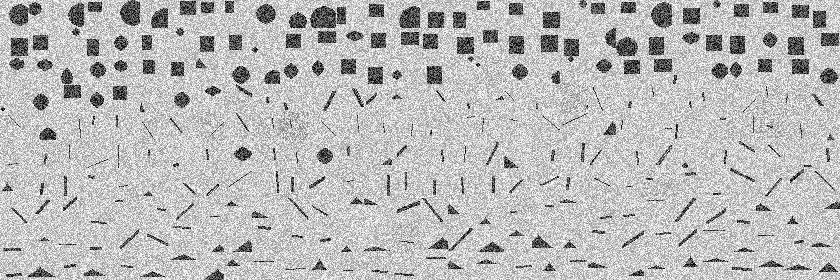

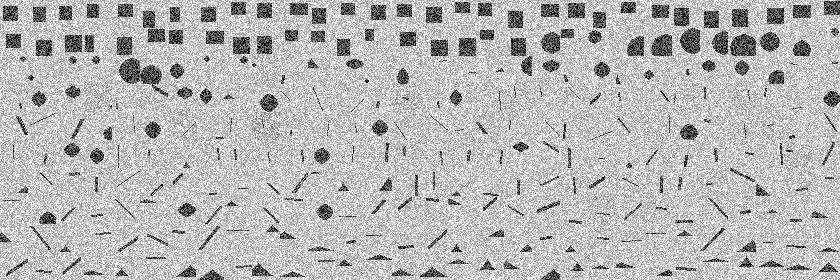

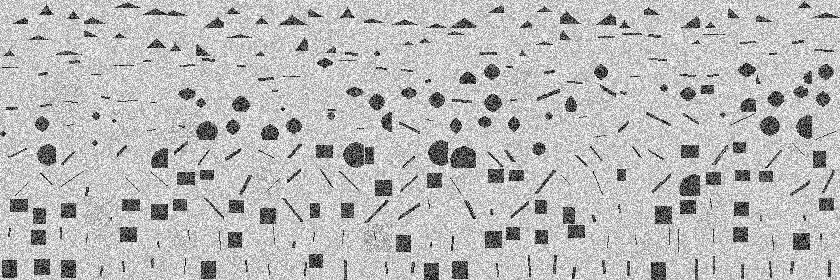

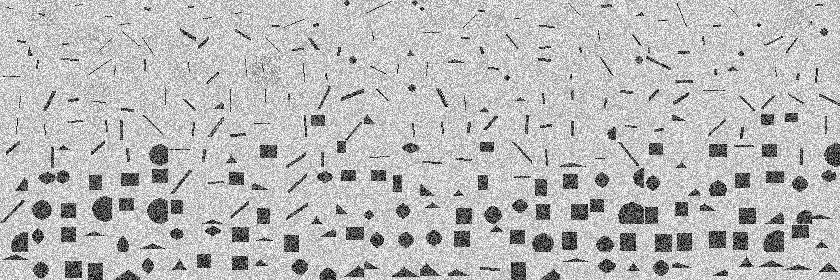

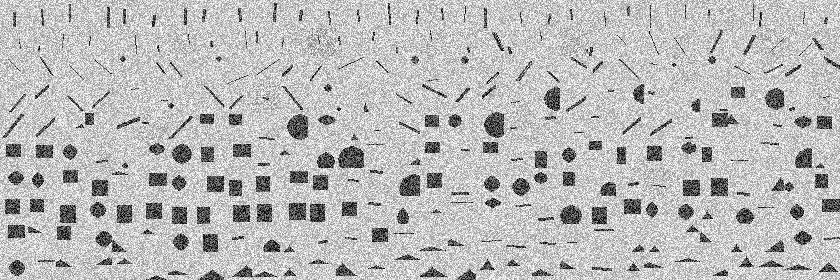

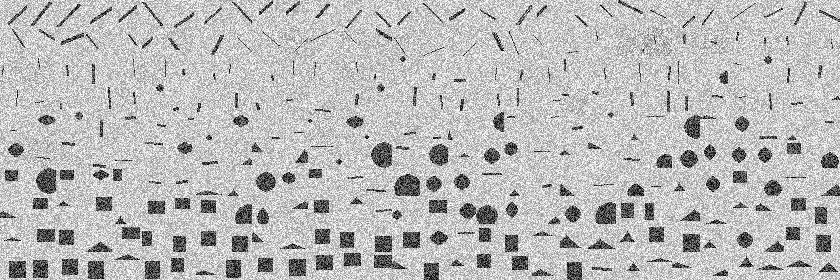

In [49]:
getCompareImages("circle", ordered_circle_dist)
getCompareImages("square", ordered_square_dist)
getCompareImages("triangle", ordered_triangle_dist)
getCompareImages("horizontal", ordered_hor_dist)
getCompareImages("vertical", ordered_ver_dist)
getCompareImages("diagonal", ordered_dia_dist)
